<a href="https://colab.research.google.com/github/HimashiBal/Predicting-Shark-Habitats/blob/main/current_workingof_random_forest_dc_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
old_df=pd.read_csv('/content/drive/MyDrive/Research_Project_Sharks/processed data/final_cleaned_data.csv')

In [ ]:
null_count = old_df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 3


In [ ]:
df = old_df.dropna()

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
print(df['g'].median())
print(df['g'].mean())

0.8104088186579474
0.7900251967233232


In [ ]:
def my_func(g):
    if g < 1 and g > 0.81:
      return "bad"
    if g < 0.81:
      return "good"
    #This function can be longer and do more things


df['G'] = df.apply( lambda x: my_func( x.g), axis = 1 )

<ipython-input-12-33ec2ad0d17d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['G'] = df.apply( lambda x: my_func( x.g), axis = 1 )


In [ ]:
print(df['G'])

0        bad
1        bad
2        bad
3        bad
4        bad
        ... 
8207    good
8208    good
8209    good
8210    good
8211    good
Name: G, Length: 8212, dtype: object


In [ ]:
df.head(10)

,Unnamed: 0,id,date,lon,lat,sss,chl,z,sst,dtc,g,G
0,0,1,2013-03-23 12:00:00,-86.290063,21.239983,37.289990,0.109919,2015,25.682531,44.0,0.841428,bad
1,1,1,2013-03-24 12:00:00,-86.479020,22.096226,36.573193,0.141271,1623,25.390950,71.0,0.847735,bad
2,2,1,2013-03-25 12:00:00,-86.725278,22.679689,35.812332,0.169360,1213,25.390950,124.0,0.849799,bad
3,3,1,2013-03-26 12:00:00,-87.163946,23.257706,36.376460,0.138979,469,24.639915,182.0,0.847627,bad
4,4,1,2013-03-27 12:00:00,-87.650941,23.762229,36.213284,0.185825,411,24.639915,240.0,0.836532,bad
5,5,1,2013-03-28 12:00:00,-88.097640,24.128654,36.252254,0.190225,190,23.954365,243.0,0.818030,bad
6,6,1,2013-03-29 12:00:00,-88.356787,24.071851,37.088737,0.188634,44,23.954365,220.0,0.813344,bad
7,7,1,2013-03-30 12:00:00,-88.371933,23.989850,36.071507,0.184534,42,23.962017,213.0,0.811642,bad
8,8,1,2013-03-31 12:00:00,-88.421148,23.969254,37.030354,0.119957,56,23.962017,207.0,0.809925,good
9,9,1,2013-04-01 12:00:00,-88.461146,24.040302,36.630657,0.126191,57,24.962963,211.0,0.808526,good


In [ ]:
new_df = df.drop(['date', 'g', 'Unnamed: 0' ,'id' ,'lat', 'lon'], axis=1)

In [ ]:
new_df.to_csv("new_df.csv")

In [ ]:
new_df.head(250)

,sss,chl,z,sst,dtc,G
0,37.289990,0.109919,2015,25.682531,44.0,bad
1,36.573193,0.141271,1623,25.390950,71.0,bad
2,35.812332,0.169360,1213,25.390950,124.0,bad
3,36.376460,0.138979,469,24.639915,182.0,bad
4,36.213284,0.185825,411,24.639915,240.0,bad
...,...,...,...,...,...,...
245,37.130280,0.111945,1206,27.880570,110.0,good
246,37.130280,0.111945,1496,27.880570,111.0,good
247,37.507360,0.106340,652,27.880570,100.0,good
248,35.105860,0.119841,1015,27.880570,106.0,good


In [ ]:
# X = new_df.iloc[:,3:9].values#features
# y = new_df.iloc[:,9].values# Target variable

In [ ]:
# Split the data into features (X) and target (y)


X = new_df.drop(['G'], axis=1)

y = new_df['G']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8040170419963482


In [ ]:
# # Export the first three decision trees from the forest

# for i in range(3):
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,
#                                filled=True,
#                                max_depth=2,
#                                impurity=False,
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dfb53a8d8a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dfb53a8d6f0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 249}


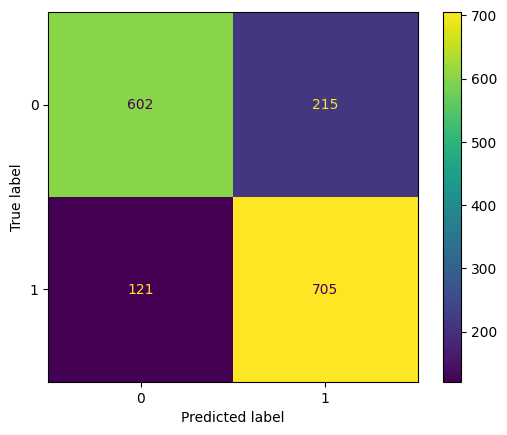

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6244674376141205
Precision: 0.6244674376141205
Recall: 0.6244674376141205


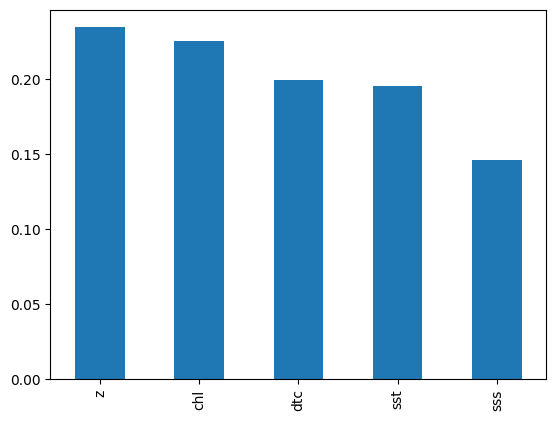

In [ ]:
X_train = pd.DataFrame(X_train)

# X_test = pd.DataFrame(X_test, columns=X.columns)
# column_names = X_train.columns.values.tolist()
# feature_importances = pd.Series(best_rf.feature_importances_, index= list(X_train.columns.values).sort_values(ascending=False))
# column_names = list(df.columns.values)
# Plot a simple bar chart


# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index= X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
for col in X_train.columns:
    print(col)

sss
chl
z
sst
dtc


In [ ]:
# Calculate minimum and maximum values for each feature
min_values = new_df.min()
max_values = new_df.max()

print("sst_C: min", min_values['sst'], "max", max_values['sst'])
print("salinity: min", min_values['sss'], "max", max_values['sss'])
print("min chlorophyll: min", min_values['chl'], "max", max_values['chl'])
print("elevation: min", min_values['z'], "max", max_values['z'])

sst_C: min 7.769911 max 30.46212
salinity: min 25.063313 max 39.815094
min chlorophyll: min 0.034808 max 29.741718
elevation: min -6447 max 6779


In [ ]:
# Using dataframe data, take 100 datapoints at random from the 'data' dataframe onto another dataframe
new_data = new_df.sample(n=8212)

In [ ]:
# Randomize the values in the specified column
new_data['sst'] = np.random.uniform(min_values['sst'] * .75, max_values['sst'] * 1.25, size=len(df))
new_data['sss'] = np.random.uniform(min_values['sss'] * .75, max_values['sss'] * 1.25, size=len(df))
new_data['chl'] = np.random.uniform(min_values['chl'] * .75, max_values['chl'] * 1.25, size=len(df))
new_data['z'] = np.random.uniform(min_values['z'] * .75, max_values['z'] * 1.25, size=len(df))

# Print the DataFrame with randomized values
new_data.head(200)

,sss,chl,z,sst,dtc,G
2653,34.263215,7.673008,6595.885540,20.525923,45.0,bad
6010,40.828527,11.987107,1208.638593,23.994420,11.0,bad
2126,23.641294,18.211198,4795.425927,34.718693,40.0,good
217,37.822033,37.173389,967.243225,19.781134,114.0,good
4262,30.076464,34.635851,-3413.898123,10.801119,129.0,good
...,...,...,...,...,...,...
5962,42.453970,17.854885,-4539.893148,21.393725,61.0,bad
191,34.667324,26.021327,8208.443762,30.342473,145.0,bad
5622,47.393102,9.241820,-855.514312,14.231323,77.0,bad
7619,35.315237,12.129138,293.718152,32.280729,149.0,good


In [ ]:
# Use the trained Decision Tree classifier 'clf' and a new DataFrame 'new_data' with columns for 'sea surface temperature',
# 'sea salinity level', 'chlorophyll concentration', 'elevation'.
# Ensure 'new_data' has the same column names and order as the training data

# Make predictions on the new data
new_predictions = best_rf.predict(new_data[['sst', 'sss', 'chl', 'z','dtc']])

# Convert numerical predictions back to original labels if needed
new_predictions_labels = le.inverse_transform(new_predictions)

# Add the predictions to the new data DataFrame
new_data['predicted_shark_habitat'] = new_predictions_labels

#print(new_data[['sst_C', 'salinity', 'chlorophyll', 'elevation', 'predicted_shark_habitat']])
new_data.head(50)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'new_data' is your new DataFrame
# Assuming 'rf_model' is your trained RandomForestClassifier

# Preprocess the new data (ensure the preprocessing steps match those used for the training data)
# ...

# Use label encoding if your target variable is categorical
le = LabelEncoder()
new_data['encoded_target'] = le.fit_transform(new_data['G'])

# Assume 'features' are the features used for training (same order and format)
new_data_features = new_data[[ 'sss', 'chl', 'z' ,'sst', 'dtc']]

# Make predictions
new_data_predictions = best_rf.predict(new_data_features)

# If you used label encoding for the target variable, you might want to inverse_transform
# new_data['predicted_target'] = le.inverse_transform(new_data_predictions)

# Add the predictions to the new data DataFrame
new_data['predicted_target'] = new_data_predictions

# Print or further analyze the predictions
print(new_data[['sss', 'chl', 'z' ,'sst', 'dtc','G','predicted_target']])


            sss        chl            z        sst     dtc     G  \
2653  34.263215   7.673008  6595.885540  20.525923    45.0   bad   
6010  40.828527  11.987107  1208.638593  23.994420    11.0   bad   
2126  23.641294  18.211198  4795.425927  34.718693    40.0  good   
217   37.822033  37.173389   967.243225  19.781134   114.0  good   
4262  30.076464  34.635851 -3413.898123  10.801119   129.0  good   
...         ...        ...          ...        ...     ...   ...   
1922  45.492574  34.445403    99.321867  19.469282   254.0   bad   
3536  42.170845  19.861079  8077.370020  32.893710    85.0   bad   
7549  42.431120  23.078330 -1593.698367  27.435606   236.0   bad   
3706  23.832431  35.384907  3483.199734  24.188975  1173.0   bad   
6382  44.629382  25.935012 -3013.407577  27.901748   139.0  good   

     predicted_target  
2653              bad  
6010             good  
2126              bad  
217              good  
4262             good  
...               ...  
1922           

In [ ]:
new_data.head(250)

,sss,chl,z,sst,dtc,G,encoded_target,predicted_target
2653,34.263215,7.673008,6595.885540,20.525923,45.0,bad,0,bad
6010,40.828527,11.987107,1208.638593,23.994420,11.0,bad,0,good
2126,23.641294,18.211198,4795.425927,34.718693,40.0,good,1,bad
217,37.822033,37.173389,967.243225,19.781134,114.0,good,1,good
4262,30.076464,34.635851,-3413.898123,10.801119,129.0,good,1,good
...,...,...,...,...,...,...,...,...
2241,23.458546,35.525560,-821.814151,18.530046,32.0,good,1,bad
5240,22.772699,22.925951,283.565957,23.309046,153.0,good,1,bad
3388,22.219906,31.460065,-791.577660,9.297320,1063.0,good,1,bad
3815,23.839472,8.067700,-2128.501626,27.977293,1661.0,bad,0,bad


In [ ]:
new_data.to_csv("final_mpm_rand.csv")

In [ ]:
def my_func(G,predicted_target):


    if new_data['G'].equals(new_data['predicted_target']):
    # if new_data['G'] == new_data['predicted_target']:
      return "true"
    else:
      return "false"
    #This function can be longer and do more things


new_data['shift'] = new_data.apply( lambda x: my_func( new_data.G, new_data.predicted_target), axis = 1 )

In [ ]:
new_data.head()

,sss,chl,z,sst,dtc,G,encoded_target,predicted_target,shift
2653,34.263215,7.673008,6595.885540,20.525923,45.0,bad,0,bad,false
6010,40.828527,11.987107,1208.638593,23.994420,11.0,bad,0,good,false
2126,23.641294,18.211198,4795.425927,34.718693,40.0,good,1,bad,false
217,37.822033,37.173389,967.243225,19.781134,114.0,good,1,good,false
4262,30.076464,34.635851,-3413.898123,10.801119,129.0,good,1,good,false
